In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import norm
import energyflow as ef #needed for the Geant4 datasets

/global/home/users/bpnachman/anaconda3/envs/tf2/lib/python3.8/site-packages/energyflow/emd.py:915: UserWarning: emd module requires 'wasserstein' or 'pot', both of which are unavailable
  warnings.warn(message)


In [2]:
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model
import tensorflow.keras.backend as K

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES']="3"
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=24220)]) #in MB

## Read in the Delphes Dataset

In [3]:
w10 = 4.568e-10
w14 = 1.380e-11
w18 = 4.347e-13

In [4]:
myfile = open("/clusterfs/ml4hep/bpnachman/EnsembleLearning/priors/dijets.txt")
delphes_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes_v2 = np.array(delphes_v2)

myfile = open("/clusterfs/ml4hep/bpnachman/EnsembleLearning/priors/dijets14.txt")
delphes14_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes14_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes14_v2 = np.array(delphes14_v2)

myfile = open("/clusterfs/ml4hep/bpnachman/EnsembleLearning/priors/dijets18.txt")
delphes18_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes18_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes18_v2 = np.array(delphes18_v2)

In [5]:
delphes_v2_all = np.concatenate([delphes_v2,delphes14_v2,delphes18_v2])
delphes_weights = np.concatenate([w10*np.ones(len(delphes_v2)),w14*np.ones(len(delphes14_v2)),w18*np.ones(len(delphes18_v2))])

Text(0.5, 0, '$m_{jj}$ [GeV]')

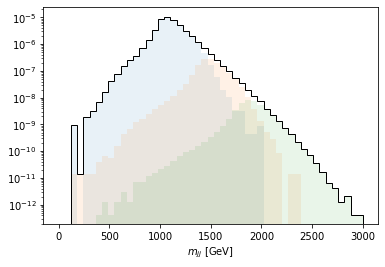

In [6]:
plt.hist(delphes_v2[:,1],weights=w10*np.ones(len(delphes_v2)),alpha=0.1,bins=np.linspace(0,3000,50))
plt.hist(delphes14_v2[:,1],weights=w14*np.ones(len(delphes14_v2)),alpha=0.1,bins=np.linspace(0,3000,50))
plt.hist(delphes18_v2[:,1],weights=w18*np.ones(len(delphes18_v2)),alpha=0.1,bins=np.linspace(0,3000,50))
plt.hist(delphes_v2_all[:,1],weights=delphes_weights,histtype="step",color="black",bins=np.linspace(0,3000,50))
plt.yscale("log")
plt.xlabel("$m_{jj}$ [GeV]")

In [7]:
#mjj

mjjs_delphes = []
mjjsg_delphes = []
weights_delphes = []
pTs_delphes = []
pTsg_delphes = []
etas_delphes = []
etasg_delphes = []
for i in range(len(delphes_v2)):
    
    #Truth
    pT1g = delphes_v2[i,1]
    pT2g = delphes_v2[i,11]
    
    y1g = delphes_v2[i,2]
    y2g = delphes_v2[i,12]
    
    phi1g = delphes_v2[i,3]
    phi2g = delphes_v2[i,13]
    
    m1g = delphes_v2[i,4]
    m2g = delphes_v2[i,14]
    
    ET1g = np.sqrt(pT1g**2+m1g**2)
    ET2g = np.sqrt(pT2g**2+m2g**2)
    
    mJJg = m1g**2+m2g**2+2*(ET1g*ET2g*np.cosh(y1g-y2g)-pT1g*pT2g*np.cos(phi1g-phi2g))
    mjjsg_delphes+=[mJJg**0.5]
    mjjsg_delphes+=[mJJg**0.5]
    pTsg_delphes+=[pT1g]
    pTsg_delphes+=[pT2g]
    etasg_delphes+=[y1g]
    etasg_delphes+=[y2g]
    
    #Reco
    pT1 = delphes_v2[i,6]
    pT2 = delphes_v2[i,16]
    
    y1 = delphes_v2[i,7]
    y2 = delphes_v2[i,17]
    
    phi1 = delphes_v2[i,8]
    phi2 = delphes_v2[i,18]
    
    m1 = delphes_v2[i,9]
    m2 = delphes_v2[i,19]
    
    ET1 = np.sqrt(pT1**2+m1**2)
    ET2 = np.sqrt(pT2**2+m2**2)
    
    mJJ = m1**2+m2**2+2*(ET1*ET2*np.cosh(y1-y2)-pT1*pT2*np.cos(phi1-phi2))
    mjjs_delphes+=[mJJ**0.5]
    mjjs_delphes+=[mJJ**0.5]
    pTs_delphes+=[pT1g]
    pTs_delphes+=[pT2g]
    etas_delphes+=[y1]
    etas_delphes+=[y2]
    
    weights_delphes+=[delphes_weights[i]]
    weights_delphes+=[delphes_weights[i]]

## Read in the Geant4 Dataset

In [8]:
sim = ef.mod.load(dataset='sim',subdatasets=["SIM1000_Jet300_pT375-infGeV"])
gen = ef.mod.load(dataset='gen',subdatasets=["GEN1000_pT375-infGeV"])

sim14 = ef.mod.load(dataset='sim',subdatasets=["SIM1400_Jet300_pT375-infGeV"])
sim18 = ef.mod.load(dataset='sim',subdatasets=["SIM1800_Jet300_pT375-infGeV"])

gen14 = ef.mod.load(dataset='gen',subdatasets=["GEN1400_pT375-infGeV"])
gen18 = ef.mod.load(dataset='gen',subdatasets=["GEN1800_pT375-infGeV"])

In [9]:
simjets_f = sim.jets_f[0:20000]
sim14jets_f = sim14.jets_f[0:20000]
sim18jets_f = sim18.jets_f[0:20000]

In [10]:
#mjj

simjets = np.concatenate([sim.jets_f,sim14.jets_f,sim18.jets_f])

mjjs = []
mjjsg = []
weights = []
pTs = []
pTsg = []
etas = []
etasg = []
for i in range(int(len(simjets)/2.)):
    
    #Truth
    pT1g = simjets[2*i,8]
    pT2g = simjets[2*i+1,8]
    
    y1g = simjets[2*i,9]
    y2g = simjets[2*i+1,9]
    
    phi1g = simjets[2*i,10]
    phi2g = simjets[2*i+1,10]
    
    m1g = simjets[2*i,11]
    m2g = simjets[2*i+1,11]
    
    ET1g = np.sqrt(pT1g**2+m1g**2)
    ET2g = np.sqrt(pT2g**2+m2g**2)
    
    mJJg = m1g**2+m2g**2+2*(ET1g*ET2g*np.cosh(y1g-y2g)-pT1g*pT2g*np.cos(phi1g-phi2g))
    mjjsg+=[mJJg**0.5]
    mjjsg+=[mJJg**0.5]
    pTsg+=[pT1g]
    pTsg+=[pT2g]
    etasg+=[y1g]
    etasg+=[y2g]
    
    #Reco
    pT1 = simjets[2*i,0]
    pT2 = simjets[2*i+1,0]
    
    y1 = simjets[2*i,1]
    y2 = simjets[2*i+1,1]
    
    phi1 = simjets[2*i,2]
    phi2 = simjets[2*i+1,2]
    
    m1 = simjets[2*i,3]
    m2 = simjets[2*i+1,3]
    
    ET1 = np.sqrt(pT1**2+m1**2)
    ET2 = np.sqrt(pT2**2+m2**2)
    
    mJJ = m1**2+m2**2+2*(ET1*ET2*np.cosh(y1-y2)-pT1*pT2*np.cos(phi1-phi2))
    mjjs+=[mJJ**0.5]
    mjjs+=[mJJ**0.5]
    pTs+=[pT1g]
    pTs+=[pT2g]
    etas+=[y1]
    etas+=[y2]
    
    weights+=[simjets[2*i,-1]]
    weights+=[simjets[2*i,-1]]

In [11]:
#Divide in half

inds1_d = np.random.choice(range(len(mjjs_delphes)), size=(int(0.5*len(mjjs_delphes)),), replace=False)
inds2_d = list(set(range(len(inds1_d))) - set(inds1_d))

mjjs_delphes = np.array(mjjs_delphes)
mjjsg_delphes = np.array(mjjsg_delphes)
weights_delphes = np.array(weights_delphes)
mjjs_delphes_firsthalf = mjjs_delphes[inds1_d]
mjjs_delphes_secondhalf = mjjs_delphes[inds2_d]
mjjsg_delphes_firsthalf = mjjsg_delphes[inds1_d]
mjjsg_delphes_secondhalf = mjjsg_delphes[inds2_d]
weights_delphes_firsthalf = weights_delphes[inds1_d]
weights_delphes_secondhalf = weights_delphes[inds2_d]

inds1 = np.random.choice(range(len(mjjs)), size=(int(0.5*len(mjjs)),), replace=False)
inds2 = list(set(range(len(inds1))) - set(inds1))

mjjs = np.array(mjjs)
mjjsg = np.array(mjjsg)
weights = np.array(weights)
mjjs_firsthalf = mjjs[inds1]
mjjs_secondhalf = mjjs[inds2]
mjjsg_firsthalf = mjjsg[inds1]
mjjsg_secondhalf = mjjsg[inds2]
weights_firsthalf = weights[inds1]
weights_secondhalf = weights[inds2]

## Simulation-based Calibration

In [18]:
inputs_prior = Input((1, ))
hidden_layer_1_prior = Dense(50, activation='relu')(inputs_prior)
hidden_layer_2_prior = Dense(50, activation='relu')(hidden_layer_1_prior)
hidden_layer_3_prior = Dense(50, activation='relu')(hidden_layer_2_prior)
outputs_prior = Dense(1, activation='linear')(hidden_layer_3_prior)
model_prior = Model(inputs=inputs_prior, outputs=outputs_prior)

In [19]:
model_prior.compile(loss="mse",optimizer='Adam',metrics=['accuracy'])
h = model_prior.fit(mjjs_firsthalf/1000.,
          mjjsg_firsthalf/1000.,
          epochs=50,
          sample_weight=weights_firsthalf,
          batch_size=1000)

Epoch 1/50
150/150 [==============================] - 0s 2ms/step - loss: 7.0122e-09 - accuracy: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 6.6559e-09 - accuracy: 0.0000e+00
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 6.1737e-09 - accuracy: 0.0000e+00
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 5.6579e-09 - accuracy: 0.0000e+00
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 5.1554e-09 - accuracy: 0.0000e+00
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 4.6647e-09 - accuracy: 0.0000e+00
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 4.2002e-09 - accuracy: 0.0000e+00
Epoch 8/50
150/150 [==============================] - 0s 2ms/step - loss: 3.7616e-09 - accuracy: 0.0000e+00
Epoch 9/50
150/150 [==============================] - 0s 2ms/step - loss: 3.3552e-09 - accuracy: 0.0000e+00
Epoch 10/50
150/150 [=======

In [20]:
pres_mass = model_prior.predict(mjjs_secondhalf/1000.,batch_size=1000).flatten()

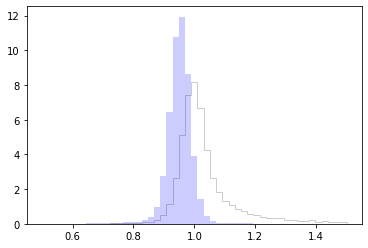

In [21]:
_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf,bins=np.linspace(0.5,1.5,50),alpha=0.2,density=True,color="blue",label="QCD, Delphes")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=weights_secondhalf,bins=np.linspace(0.5,1.5,50),alpha=0.2,density=True,color="black",histtype="step")

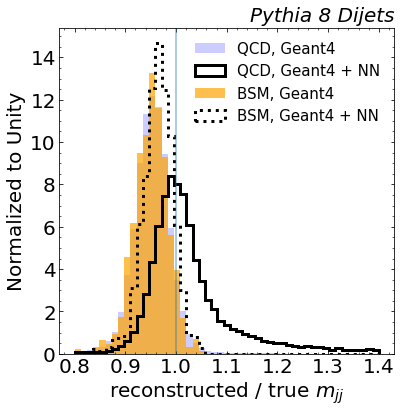

In [22]:
mybins = np.logspace(np.log(2000)/np.log(10),np.log(5000)/np.log(10),50)
mybinsB = np.linspace(0.8,1.4,50)

resmass = 2800

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,alpha=0.2,density=True,color="blue",label="QCD, Geant4")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,density=True,color="black",histtype="step",label="QCD, Geant4 + NN",lw=3)

ww,bins = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bins[:-1]+bins[1:]),ww)

_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,alpha=0.7,density=True,color="orange",label="BSM, Geant4")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,density=True,color="black",histtype="step",label="BSM, Geant4 + NN",lw=3,ls=":")

plt.ylabel("Normalized to Unity",fontsize=20)
#plt.xlim([mymin,mymax])
#plt.yscale("log")
#plt.ylim([1e-6,1e-1])
#plt.locator_params(axis='y', nbins=6)
plt.axvline(1,alpha=0.5)
plt.xlabel("reconstructed / true $m_{jj}$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Pythia 8 Dijets",loc="right",fontsize=20, fontstyle="italic")
plt.savefig("NN_prior.pdf",bbox_inches='tight')

## Data-based Optimal Transport Calibration

In [35]:
x0_x = np.sort(mjjs_delphes_firsthalf)
w0_x = [x for _, x in sorted(zip(mjjs_delphes_firsthalf, weights_delphes_firsthalf))]
x0_ecdf = np.cumsum(w0_x)/np.sum(w0_x)

x1_x = np.sort(mjjs_firsthalf)
w1_x = [x for _, x in sorted(zip(mjjs_firsthalf, weights_firsthalf))]
x1_ecdf = np.cumsum(w1_x)/np.sum(w1_x)

def my_mjj_calib(x):
    firstpart = np.interp(x,x0_x,x0_ecdf)
    return np.interp(firstpart,x1_ecdf,x1_x)

<ipython-input-36-a5e09e17bcb3>:59: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(0.5*(b[1:]+b[:-1]),nt0/(nt1+0),color='black',ls=":")
<ipython-input-36-a5e09e17bcb3>:59: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[1:]+b[:-1]),nt0/(nt1+0),color='black',ls=":")
<ipython-input-36-a5e09e17bcb3>:60: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(0.5*(b[1:]+b[:-1]),nt/(nt1+0),color='blue',lw=4,alpha=0.7)


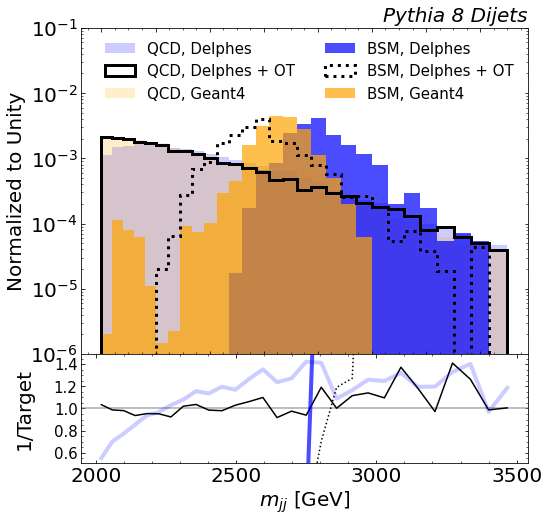

In [36]:
mybins = np.logspace(np.log(2000)/np.log(10),np.log(3500)/np.log(10),30)

resmass = 2800

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
ax0.minorticks_on()

nT,b,_=plt.hist(mjjs_delphes_secondhalf,weights=weights_delphes_secondhalf,bins=mybins,alpha=0.2,density=True,color="blue",label="QCD, Delphes")
nT0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=weights_delphes_secondhalf,bins=mybins,density=True,color="black",lw=3,histtype="step",label="QCD, Delphes + OT")
nT1,_,_=plt.hist(mjjs_secondhalf,weights=weights_secondhalf,bins=mybins,density=True,alpha=0.2,color="orange",label="QCD, Geant4")

###

ww,bins = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bins[:-1]+bins[1:]),ww)

ww_delphes,bins = np.histogram(mjjsg_delphes_secondhalf,bins=mybins)
ww_delphes = np.interp(mjjsg_delphes_secondhalf,0.5*(bins[:-1]+bins[1:]),ww_delphes)

nt,_,_=plt.hist(mjjs_delphes_secondhalf,weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,bins=mybins,alpha=0.7,density=True,color="blue",label="BSM, Delphes")
nt0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,bins=mybins,density=True,histtype="step",ls=":",lw=3,color="black",label="BSM, Delphes + OT")
nt1,_,_=plt.hist(mjjs_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybins,alpha=0.7,density=True,color="orange",label="BSM, Geant4")

###

plt.ylabel("Normalized to Unity",fontsize=20)
plt.yscale("log")
plt.ylim([1e-6,1e-1])
plt.legend(frameon=False,fontsize=15,ncol=2)
_=plt.title("Pythia 8 Dijets",loc="right",fontsize=20, fontstyle="italic")

ax1 = plt.subplot(gs[1])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(direction="in",which="both")
ax1.minorticks_on()
plt.locator_params(axis='x', nbins=6)
plt.xlabel("$m_{jj}$ [GeV]",fontsize=20)
plt.ylabel("1/Target",fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.axhline(y=1,linewidth=2, color='gray', alpha=0.5)  
plt.plot(0.5*(b[1:]+b[:-1]),nT0/(nT1+0),color='black')
plt.plot(0.5*(b[1:]+b[:-1]),nT/(nT1+0),color='blue',lw=4,alpha=0.2)

bb=0.5*(b[1:]+b[:-1])
nt[bb<2800]=0
nt0[bb<2800]=0
plt.plot(0.5*(b[1:]+b[:-1]),nt0/(nt1+0),color='black',ls=":")
plt.plot(0.5*(b[1:]+b[:-1]),nt/(nt1+0),color='blue',lw=4,alpha=0.7)

plt.ylim(0.51,1.49)
plt.savefig("OT.pdf",bbox_inches='tight')

## Gaussian examples

In [23]:
gauss_truth_prior = np.random.normal(0,1,10000)
gauss_reco_prior = np.random.normal(gauss_truth_prior,2,10000)
mycalibration = np.polyfit(gauss_reco_prior, gauss_truth_prior, 1)
mypoly = np.poly1d(mycalibration)

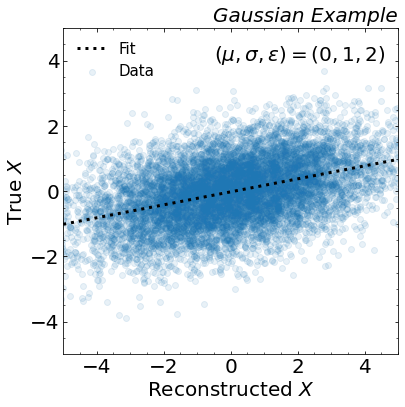

In [24]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.scatter(gauss_reco_prior,gauss_truth_prior,label="Data",alpha=0.1)
plt.plot(np.linspace(-5,5,20),mypoly(np.linspace(-5,5,20)),label="Fit",ls=":",color="black",lw=3)

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("Reconstructed $X$",fontsize=20)
plt.ylabel("True $X$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title(r"Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-0.5,4,r"$(\mu,\sigma,\epsilon)=(0,1,2)$",fontsize=20)
plt.savefig("Gaussian_prior.pdf",bbox_inches='tight')

In [25]:
def b(x,sigma,epsilon,mu):
    return (sigma**2/(sigma**2+epsilon**2))*x+(epsilon**2/(sigma**2+epsilon**2))*mu

In [26]:
meanvals = np.array([np.mean(mypoly(np.random.normal(xx,2,10000))) for xx in np.linspace(-5,5,20)])
meanvals_analytic = b(np.linspace(-5,5,20),1,2,0)

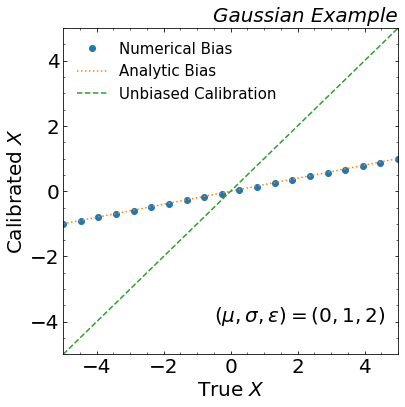

In [27]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(np.linspace(-5,5,20),meanvals,marker='o',ls="",label="Numerical Bias")
plt.plot(np.linspace(-5,5,20),meanvals_analytic,ls=":",label="Analytic Bias")
plt.plot(np.linspace(-5,5,20),np.linspace(-5,5,20),ls="--",label="Unbiased Calibration")

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("True $X$",fontsize=20)
plt.ylabel("Calibrated $X$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-0.5,-4,r"$(\mu,\sigma,\epsilon)=(0,1,2)$",fontsize=20)
plt.savefig("Gaussian_prior2.pdf",bbox_inches='tight')

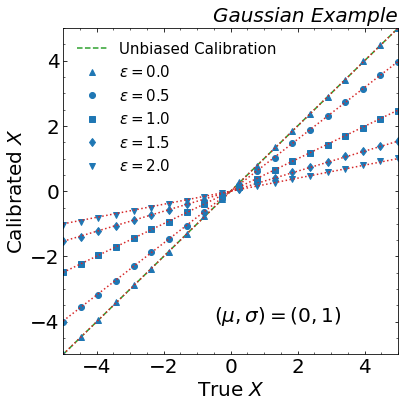

In [28]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(np.linspace(-5,5,20),np.linspace(-5,5,20),ls="--",label="Unbiased Calibration",color="tab:green")
markers = ["^","o","s","d","v"]
myc=-1
for epsilon in np.linspace(0.01,2,5):
    myc+=1
    gauss_truth_prior_B = np.random.normal(0,1,10000)
    gauss_reco_prior_B = np.random.normal(gauss_truth_prior_B,epsilon,10000)
    mycalibration_B = np.polyfit(gauss_reco_prior_B, gauss_truth_prior_B, 1)
    mypoly_B = np.poly1d(mycalibration_B)

    meanvals_B = np.array([np.mean(mypoly_B(np.random.normal(xx,2,10000))) for xx in np.linspace(-5,5,20)])
    meanvals_analytic_B = b(np.linspace(-5,5,20),1,epsilon,0)

    plt.plot(np.linspace(-5,5,20),meanvals_B,marker=markers[myc],ls="",color="tab:blue",label="$\epsilon=%0.1f$" % epsilon)
    plt.plot(np.linspace(-5,5,20),meanvals_analytic_B,ls=":",color="tab:red")

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("True $X$",fontsize=20)
plt.ylabel("Calibrated $X$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-0.5,-4,r"$(\mu,\sigma)=(0,1)$",fontsize=20)
plt.savefig("Gaussian_prior3.pdf",bbox_inches='tight')

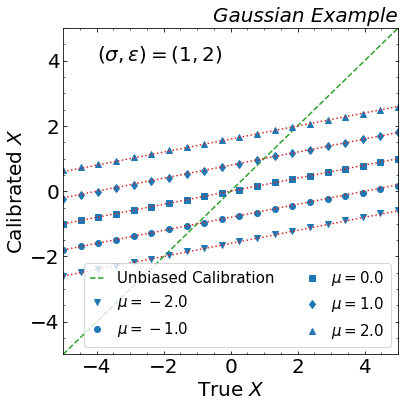

In [29]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(np.linspace(-5,5,20),np.linspace(-5,5,20),ls="--",label="Unbiased Calibration",color="tab:green")
markers = ["v","o","s","d","^"]
myc=-1
for epsilon in np.linspace(-2,2,5):
    myc+=1
    gauss_truth_prior_B = np.random.normal(epsilon,1,10000)
    gauss_reco_prior_B = np.random.normal(gauss_truth_prior_B,2,10000)
    mycalibration_B = np.polyfit(gauss_reco_prior_B, gauss_truth_prior_B, 1)
    mypoly_B = np.poly1d(mycalibration_B)

    meanvals_B = np.array([np.mean(mypoly_B(np.random.normal(xx,2,10000))) for xx in np.linspace(-5,5,20)])
    meanvals_analytic_B = b(np.linspace(-5,5,20),1,2,epsilon)

    plt.plot(np.linspace(-5,5,20),meanvals_B,marker=markers[myc],ls="",color="tab:blue",label="$\mu=%0.1f$" % epsilon)
    plt.plot(np.linspace(-5,5,20),meanvals_analytic_B,ls=":",color="tab:red")

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("True $X$",fontsize=20)
plt.ylabel("Calibrated $X$",fontsize=20)
plt.legend(frameon=True,fontsize=15,ncol=2,loc="lower right",handlelength=1)
_=plt.title("Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-4,4,r"$(\sigma,\epsilon)=(1,2)$",fontsize=20)
plt.savefig("Gaussian_prior4.pdf",bbox_inches='tight')

## Gaussian, OT example